In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/SalaryPrediction.csv')

In [ ]:
data.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


In [ ]:
# prompt: cheeck missing values

data.isnull().sum()


,0
Experience Years,0
Salary,0


The code checks if there are any missing (empty) values in the dataset.
data.isnull() finds all the empty values.
.sum() counts how many missing values are in each column.
The "Experience Years" column has 0 missing values.
The "Salary" column also has 0 missing values.
Since there are no missing values, the data is complete and ready to use—nothing needs to be fixed!

In [ ]:
# prompt: check duplicate rows

duplicate_rows = data[data.duplicated()]
print("Duplicate Rows :")
print(duplicate_rows)
print("Number of duplicate rows:", data.duplicated().sum())


Duplicate Rows :
Empty DataFrame
Columns: [Experience Years, Salary]
Index: []
Number of duplicate rows: 0


Empty DataFrame

This means there are no duplicate rows in the dataset.
The columns "Experience Years" and "Salary" have only unique entries.
Number of duplicate rows: 0

Confirms that there are zero duplicate rows in the dataset.
The dataset is clean, and you don’t need to remove or modify any duplicate records.

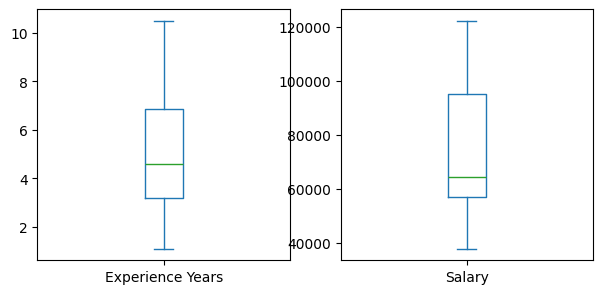

In [ ]:
# prompt: generate box plot for all columns

import matplotlib.pyplot as plt
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()


The left box plot represents Experience Years, while the right one is for Salary.
Both distributions appear well-spread, meaning there is a good range of values in both columns.
The median (green line inside the box) is near the center, indicating a balanced distribution.
There are no extreme outliers visible, so the data seems fairly clean.
This box plot helps us quickly understand the spread, median, and potential outliers in the dataset. The dataset looks well-distributed with a good range of values!

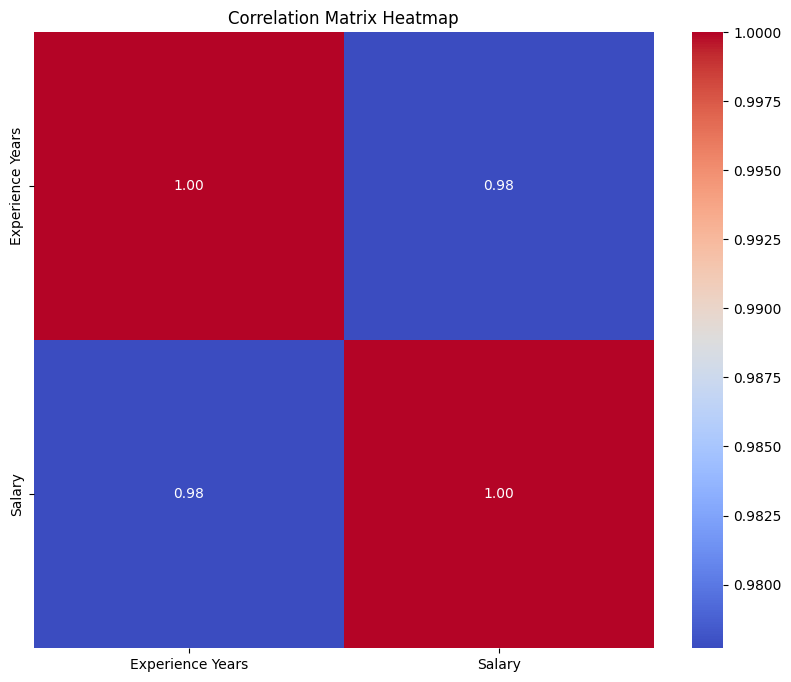

In [ ]:
# prompt: Generate Heatmap

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded as in the previous code

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


"Experience Years" and "Salary" have a correlation of 0.98, which is very close to 1.
This means there is a very strong positive relationship between experience and salary—more experience generally leads to a higher salary.
The diagonal values are all 1, which makes sense because a column is always 100% correlated with itself.
The color scale (red = strong positive correlation, blue = weaker correlation) confirms this trend.

In [ ]:
# prompt: Set y data as Salary which is a depenant variable, and x as Experience Years  which is an independant variable using statsmodel

import statsmodels.api as sm

# Assuming 'data' DataFrame is already loaded and processed as in the previous code
# Define the dependent and independent variables
y = data['Salary']
x = data['Experience Years']


In [ ]:
y

,Salary
0,39343
1,42774
2,46205
3,37731
4,43525
5,39891
6,48266
7,56642
8,60150
9,54445


In [ ]:
# prompt: Extract simple linear regression on x and y using stats model

# Assuming 'data' DataFrame and 'x', 'y' are already defined as in the previous code

# Add a constant to the independent variable
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     823.3
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           2.32e-27
Time:                        10:39:10   Log-Likelihood:                -400.39
No. Observations:                  40   AIC:                             804.8
Df Residuals:                      38   BIC:                             808.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.567e+04   1920.100  

The regression equation is: Salary = 25 , 670 + ( 9 , 523.65 × Experience Years ) Salary=25,670+(9,523.65×Experience Years) 25,670 → This is the intercept (base salary when experience is 0). 9,523.65 → This is the coefficient for "Experience Years," meaning each additional year of experience increases salary by ₹9,524 (approx).
R-squared (0.956) means the model explains 95.6% of the variation in salary, which is very high. This suggests that experience is a strong predictor of salary.
The p-value for Experience Years is 0.000, which means this relationship is statistically significant. In simple terms, there is a very strong and reliable connection between experience and salary.
The F-statistic (823.3) and its tiny p-value (2.32e-27) confirm that the model as a whole is highly significant.
This regression model strongly supports the idea that more years of experience lead to a higher salary. The model fits the data well, and the results are statistically significant.


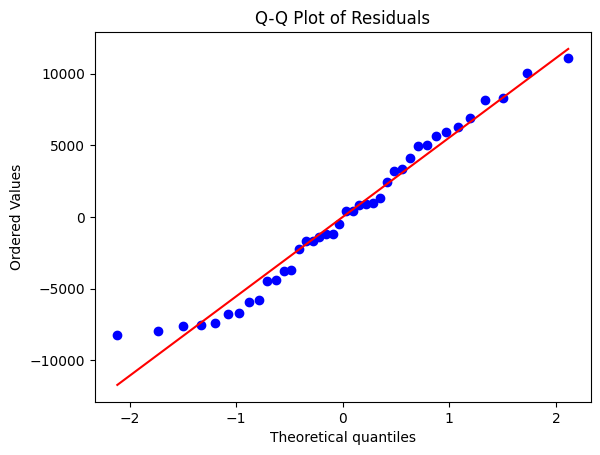

Shapiro-Wilk Test:
Statistic: 0.9610421361130027
P-value: 0.18179536109528444
Residuals are normally distributed (fail to reject H0)


In [ ]:
# prompt: check for residuals are normally distributed

import scipy.stats as stats

# Assuming 'model' is the fitted OLS model from the previous code
residuals = model.resid

# Create a Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Perform a Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test:")
print(f"Statistic: {shapiro_test.statistic}")
print(f"P-value: {shapiro_test.pvalue}")

# Interpret the results
alpha = 0.05  # Significance level
if shapiro_test.pvalue > alpha:
    print("Residuals are normally distributed (fail to reject H0)")
else:
    print("Residuals are not normally distributed (reject H0)")


A Q-Q plot was created to check if the residuals follow a normal distribution.
This test gives a statistic and a p-value to check normality.
Null Hypothesis (H₀): Residuals are normally distributed.
Alternative Hypothesis (H₁): Residuals are not normally distributed.
Since p-value > 0.05, we do not reject the assumption that the residuals are normally distributed.
This means our regression model meets the normality assumption, so our predictions are more reliable. ✅


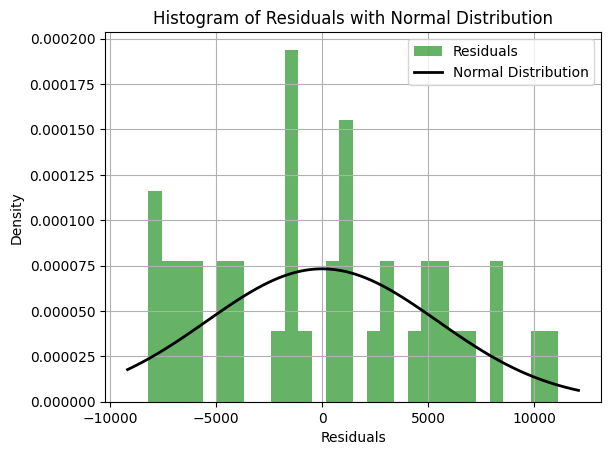

In [ ]:
# prompt: check for residuals are normally distributed fit and plot histogram with line

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'residuals' is already calculated as in the previous code

# Plot the histogram of residuals
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g', label='Residuals')

# Generate a normal distribution curve for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, loc=residuals.mean(), scale=residuals.std())
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Add labels and title
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals with Normal Distribution')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


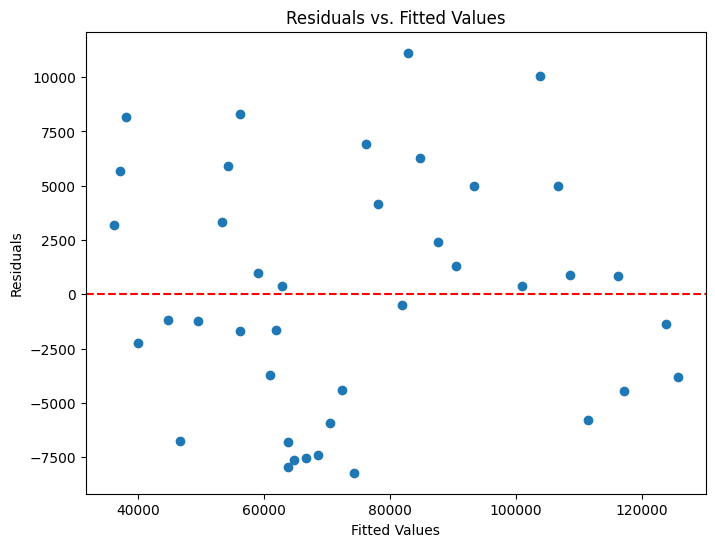

In [ ]:
# prompt: check for homoscedasticity

# Assuming 'model' is the fitted OLS model and 'x' contains the independent variable

# Get the fitted values and residuals
fitted_values = model.fittedvalues
residuals = model.resid

# Create a scatter plot of residuals vs. fitted values
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()





In [ ]:
# prompt: conduct white test for testing homoscedasticity

# White test for heteroskedasticity
from statsmodels.compat import lzip
import statsmodels.stats.diagnostic as sms

white_test = sms.het_white(model.resid, model.model.exog)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(lzip(labels, white_test)))

alpha = 0.05
if white_test[1] < alpha:
    print('Reject the null hypothesis. Heteroskedasticity is present.')
else:
    print('Fail to reject the null hypothesis. No heteroskedasticity.')


{'Test Statistic': 2.4970624227281446, 'Test Statistic p-value': 0.28692592104545683, 'F-Statistic': 1.2317876359762003, 'F-Test p-value': 0.3034575662206165}
Fail to reject the null hypothesis. No heteroskedasticity.


Test Statistic p-value = 0.287 (greater than 0.05)
F-Test p-value = 0.303 (greater than 0.05)
Conclusion:
Since both p-values are greater than 0.05, we fail to reject the null hypothesis.
This means there is no heteroskedasticity, and the errors in our model are evenly spread.

Our model meets the assumption of homoscedasticity, meaning the errors don’t show any weird patterns. This makes our regression analysis more reliable and valid.